In [1]:
from fastai.text import *

In [2]:
path = Path.cwd()/'data'

In [3]:
bs=48

In [30]:
# data_lm = TextLMDataBunch.from_folder(path, fname)

data_lm = (TextList.from_folder(path)
           #Inputs: all the text files in path
            .filter_by_folder(include='text') 
           # Only txt files from specific folders
            .split_by_rand_pct(0.1)
           #We randomly split and keep percentage for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))
data_lm.save('data_lm.pkl')

In [ ]:
# Load a saved language model
# data_lm = load_data(path, 'data_lm.pkl', bs=bs)

In [31]:
data_lm.show_batch()

idx,text
0,"excess of that passion , desire to xxunk the same soul , and from being two to be blended into one : from whence it would necessarily follow , that both or one of them must be destroyed . xxmaj but now in a city which admits of this community , the tie of friendship must , from that very cause , be xxunk weak , when no father can"
1,"the military . xxmaj besides , if he makes the wives common , while the property [ xxunk ] continues separate , who shall manage the domestic concerns with the same care which the man xxunk upon his xxunk ? nor will the inconvenience be xxunk by making property as well as wives common ; and it is absurd to draw a comparison from the brute creation , and say"
2,"usual to call those which incline most to a democracy , a free state ; those which incline most to an oligarchy , an aristocracy , because those who are rich are generally men of family and education ; besides , they enjoy those things which others are often guilty of crimes to procure : for which reason they are regarded as men of worth and honour and note ."
3,", that the most perfect political community must be amongst those who are in the middle rank , and those states are best xxunk wherein these are a larger and more respectable part , if possible , than both the other ; or , if that can not be , at least than either of them separate ; so that being thrown into the xxunk it may prevent either scale"
4,"it to move from place to place . xxmaj if , then , these are the only parts of an animal and there are differences between them ; namely , in their various sorts of xxunk , xxunk , and xxunk : to which we must add their motive powers ; the number of the combinations of all these must necessarily make up the different species of animals . xxmaj"


From fastai:

We can then put this in a learner object very easily with a model loaded with the pretrained weights. They'll be downloaded the first time you'll execute the following line and stored in `~/.fastai/models/` (or elsewhere if you specified different paths in your config file).

In [32]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


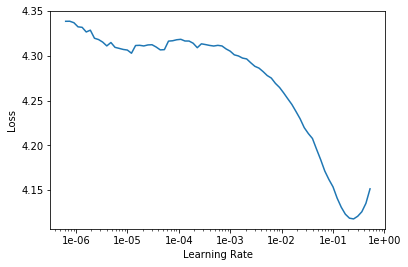

In [33]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

## Train the final layer only.
#### Accuracy refers to predicting the next word

In [34]:
learn.fit_one_cycle(4, 1e-1, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.002618,3.900104,0.252455,00:05
1,3.953908,3.976028,0.247098,00:05
2,3.717757,3.815583,0.264955,00:05
3,3.374548,3.787923,0.271131,00:05


In [35]:
learn.save('fit_head')

In [39]:
# learn.load('fit_head');

## Train all layers:

In [40]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


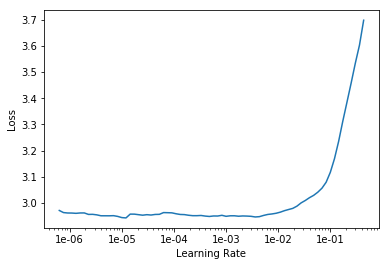

In [41]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [42]:
learn.fit_one_cycle(10, slice(1e-6, 2e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.941617,3.779816,0.269940,00:07
1,2.944947,3.776473,0.270238,00:07
2,2.927996,3.770774,0.272693,00:07
3,2.902651,3.754778,0.274182,00:07
4,2.868885,3.760026,0.274256,00:07
5,2.839413,3.748760,0.275521,00:07
6,2.802553,3.766475,0.274479,00:07
7,2.783752,3.761758,0.274107,00:07
8,2.764345,3.767164,0.271949,00:07
9,2.754989,3.760343,0.278869,00:07


In [43]:
learn.save('stage-2')

#### Small increase in accuracy after training all layers for 10 epochs.

## Test text generation:

In [ ]:
# learn.load('stage-2');

In [44]:
learn.predict("It has been said", n_words=40)

'It has been said that that passion of Sophocles was one of the chief works in the seven book of Laws , of 1 minute , where the majority of the chorus furnish about the thousand beautiful or wanted war .'

In [45]:
# Beam search does not seem to give better results, as there are many repetitions

learn.beam_search("It has been said", n_words=40)

'It has been said It has been said that a city is composed of two parts , one composed of two parts , one from the primary facts , another from the primary facts , and another from the primary facts . It is thought that the'

## Find LR and train some more

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


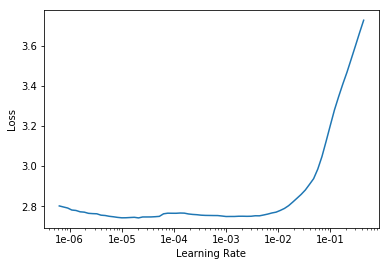

In [46]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [47]:
learn.fit_one_cycle(10, 3e-6, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.739277,3.760518,0.275223,00:06
1,2.736759,3.757621,0.276711,00:07
2,2.740536,3.764700,0.275595,00:07
3,2.743067,3.746874,0.274256,00:07
4,2.737533,3.762183,0.275595,00:07
5,2.738145,3.763246,0.275967,00:07
6,2.734339,3.778091,0.272321,00:07
7,2.738734,3.770773,0.276637,00:07
8,2.739087,3.760106,0.274033,00:07
9,2.746915,3.758924,0.275521,00:07


In [48]:
learn.save('stage-3')

#### Accuracy doesn't seem to be improving

## Test text generation:

In [ ]:
# learn.load('stage-3');

In [49]:
learn.predict("It has been said", n_words=40)

'It has been said that the state was originally governed by General , though he himself was an imitator Non and family . [ imply _ Iliad _ , which is probably a composite significant sound to the ridiculous , would'

In [50]:
learn.export('export-v2.pkl')